<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/Implement_LR_ML_SckitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** implement Single Linear regression using Scikit-learn - Advertising-Sales Dataset **

In [28]:
# import all librariers -->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# load the dataset -->
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv',index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [31]:
df.shape

(200, 4)

In [32]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
df.isnull().sum() # no null values

,0
TV,0
radio,0
newspaper,0
sales,0


In [34]:
# data pre-processing -->
df.corr()                     # positive correlation -> highly correlated

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


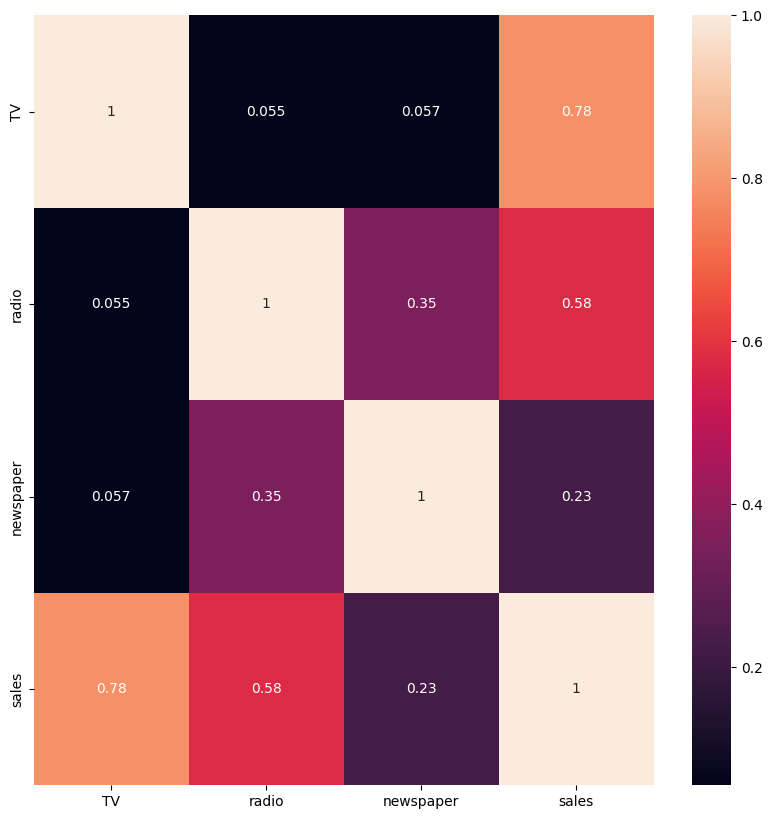

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

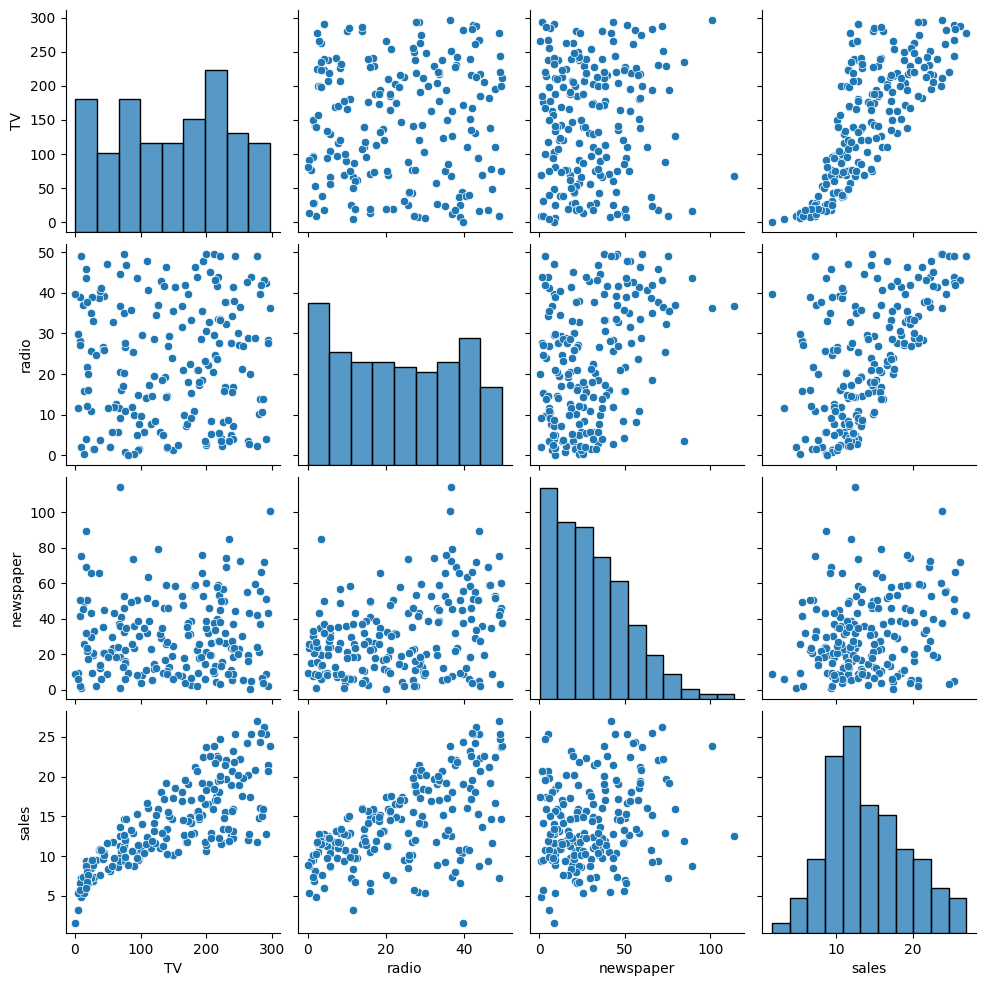

In [36]:
sns.pairplot(df)
plt.show()

In [40]:
# select feature and target value ->
X = df[['TV']]
y = df['sales']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
# make predictions on training data -->
y_pred_train = lr.predict(X_train)
print(y_pred_train)

# make predictions on testing data -->
y_pred_test = lr.predict(X_test)
print(y_pred_test)

[19.46077371 16.36372418 17.32124393 14.05926277 15.15880698 17.28459246
 19.34623785 14.80145511 11.91057012 10.80644447 15.78188203 13.46367632
 19.85019562 20.89018119 11.71814988 12.34122494 19.01179316 16.6615174
 18.31083372 16.18504824 16.06593095 11.42035666  9.28082688  9.06091804
  7.91097805 18.27418225  8.09881685 16.96389206  8.48365733 15.41994873
 16.78979756 10.33913818 14.16921719 13.23918604 11.6265212  19.98763864
 19.99680151  7.66816203 18.80562862 15.36039009  7.84683797 10.769793
 16.46451573 17.8526903  12.23127051 17.65568863 14.79229224 13.31707042
 16.78521613 15.41994873 17.24335955 10.37578966 17.71982871 16.16214107
 11.77770853 11.23709929 17.77022448 13.7019109   9.52364289 17.3166625
 16.26293263  7.55820761 18.22378647 17.22503381 17.49991986  8.57070458
 14.251683   13.6881666  12.68025107 20.30375761  9.94513484 18.187135
 17.09217222  8.1721198   7.49864897 14.84726945 11.6127769   8.62110035
 17.94431898 17.14714943  8.1996084  20.14798884 20.62903

In [44]:
# mae on training data -->
from sklearn.metrics import mean_absolute_error
mae_train = np.mean(np.abs(y_pred_train - y_train))
print(mae_train)

# mae on testing data -->
mae_test = np.mean(np.abs(y_pred_test - y_test))
print(mae_test)

2.782980807882147
2.0575465794300083


In [46]:
print(lr.coef_)
print(lr.intercept_)

[0.04581434]
7.310810165411681


In [47]:
tv_expenses = 56.7
sales_prediction = lr.predict([[tv_expenses]])
print(sales_prediction)

[9.90848337]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


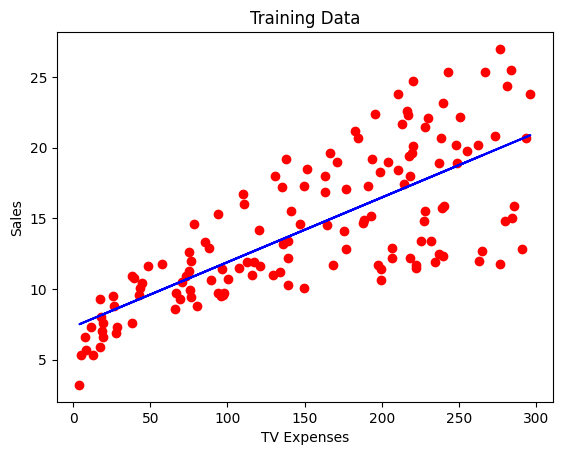

In [49]:
# best fit line for training data -->
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,lr.predict(X_train),color = 'blue')
plt.title('Training Data')
plt.xlabel('TV Expenses')
plt.ylabel('Sales')
plt.show()

Text(0, 0.5, 'Sales')

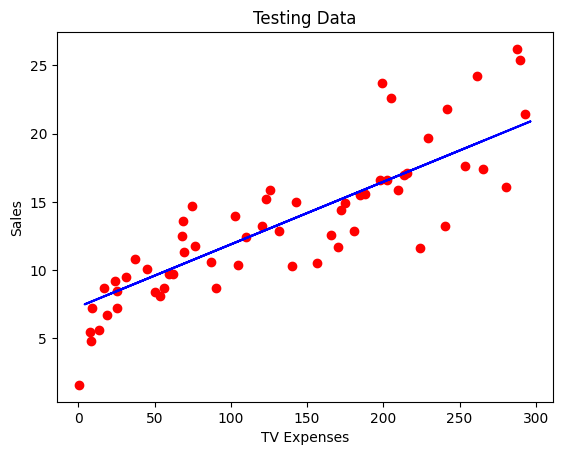

In [50]:
# best fit line for testing data -->
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,lr.predict(X_train),color = 'blue')
plt.title('Testing Data')
plt.xlabel('TV Expenses')
plt.ylabel('Sales')

In [54]:
# calculate accuracy of training data --->
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_pred_train)
print(r2_train)

# calculate accuracy of testing data --->
r2_test = r2_score(y_test,y_pred_test)
print(r2_test)

0.5552336104251212
0.725606346597073
